<a href="https://colab.research.google.com/github/Xalphanos/24f2006988_git_challenge_lab/blob/main/PytorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Pytorch Workflow
 * data- prepare and build
 * build model
* fitting model to the data present
* that is training
* saving and loading a model
*  putting all of it together




In [28]:
 import torch
 from torch import nn## the main module we will be using in this course
 import matplotlib.pyplot as plt

 torch.__version__

'2.8.0+cu126'

 ## Preparing and loading the  data we are using linear regression

In [29]:
# Create *known* parameters

weight= 0.7
bias=0.3

# create some data
start = 0
end =1
step = 0.001
X = torch.arange(start, end, step).unsqueeze(dim=1)
y= weight * X + bias

X[:10],y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0010],
         [0.0020],
         [0.0030],
         [0.0040],
         [0.0050],
         [0.0060],
         [0.0070],
         [0.0080],
         [0.0090]]),
 tensor([[0.3000],
         [0.3007],
         [0.3014],
         [0.3021],
         [0.3028],
         [0.3035],
         [0.3042],
         [0.3049],
         [0.3056],
         [0.3063]]),
 1000,
 1000)

In [30]:
len(X), len(y)

(1000, 1000)

### splitting data into training and test data sets extremely important in learning pytorch
* training set= 60 percent of the data and that is mandatory
* validation = 10 to 20 percent , its like the mock test nit mandatory but its like good to have
* testing set= we test the model compated to this data- important


In [31]:
# create a train test split

train_split= int(0.8 * len(X))

X_train, y_train= X[:train_split], y[:train_split]
X_test, y_test=X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [32]:
def plot_predictions( train_data = X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
#training the data we are making the plots

  plt.figure(figsize=(10,7))

# plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label= "Training data")

 # plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4, label="test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  plt.legend(prop={"size": 14});


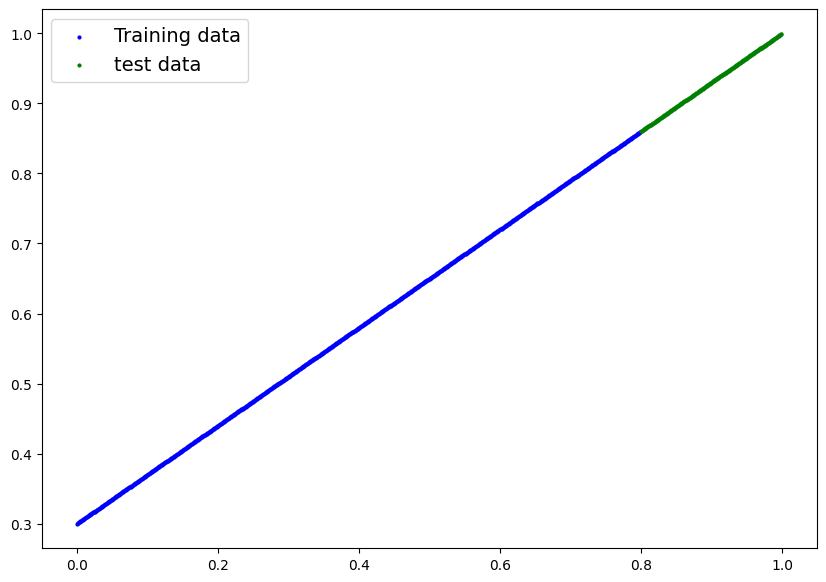

In [33]:
plot_predictions();

# Yaay we are now actuallt making the model

* start with random values
* look at training data then adjust to get closer to ideal vales

# method
* gradient descent
* backpropagation

In [34]:
# building model
from torch import nn
# create linear regressuion model class

class LinearRegressionModel(nn.Module):# inhereits rom this very importent module
  def __init__(self) -> None:
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor:# x is the input data
    return self.weights*x + self.bias # this is the linear regression formula that we discussed






# As we have Now initialised the model now we want to check the contents of the model

In [35]:
# creating a random seed to get the same random value
torch.manual_seed(42)

# create an single instance of the model
model_first=LinearRegressionModel()

#Check out the parameters
list(model_first.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [36]:
model_first.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making prediction using torch.inference_mode()

Now we are checking the model's inference data
when we pass data through our model, its going through the forward() method


In [37]:
# Make predictions with model

with torch.inference_mode():
  y_preds=model_first(X_test)

with torch.no_grad():# inference mode is preferred
  y_preds=model_first(X_test)

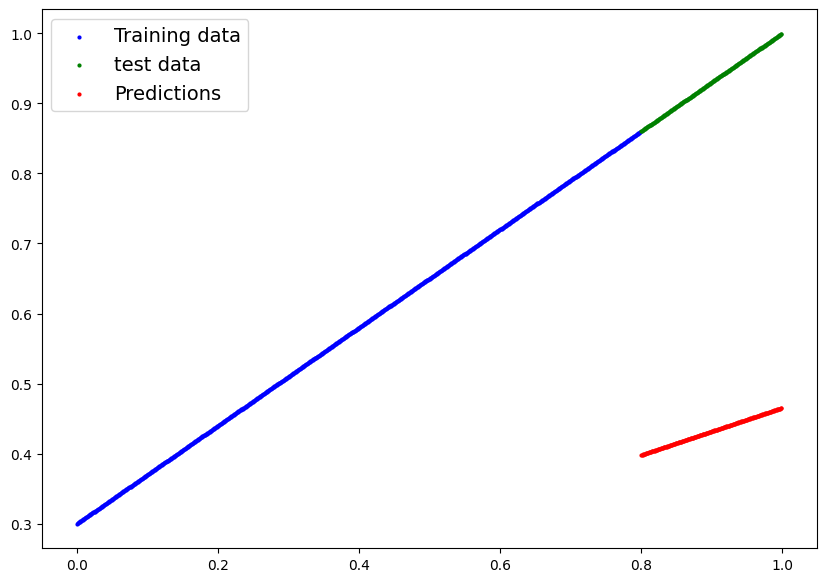

In [38]:
plot_predictions(predictions=y_preds)

# loss function to measure how far the current movel is from the ideal output, there are many pytorch loss functions and we are currently explloring them


* lower the loss function the better it is
* optimiser  adjusts the function according to the loss to adjust the model better for what we actually want as the output

In [39]:
list(model_first.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [40]:
model_first.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [41]:
# setting up the loss function
loss_fn=nn.L1Loss()

# setting up the optimiser(STD stochiastic gradient descent)
optimiser= torch.optim.SGD(params=model_first.parameters(),
                           lr=0.0001)


#building the training loop(and testing loop) in pytorch

0. loop through the data
1. forward pass to make predictions about the data
2. Calculate then loss
3. Optimiser zero grad
4. Loss backward - move backwards thorugh the network to calculate the gradients of each of the parameters of our model with respect to the loss
5. optimiser step - use optimiser to adjust model's parameters to try and lessen the loss

In [42]:
model_first.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [43]:
weight,bias

(0.7, 0.3)

# we will be graphing it

In [44]:
with torch.inference_mode():
  y_preds_new=model_first(X_test)


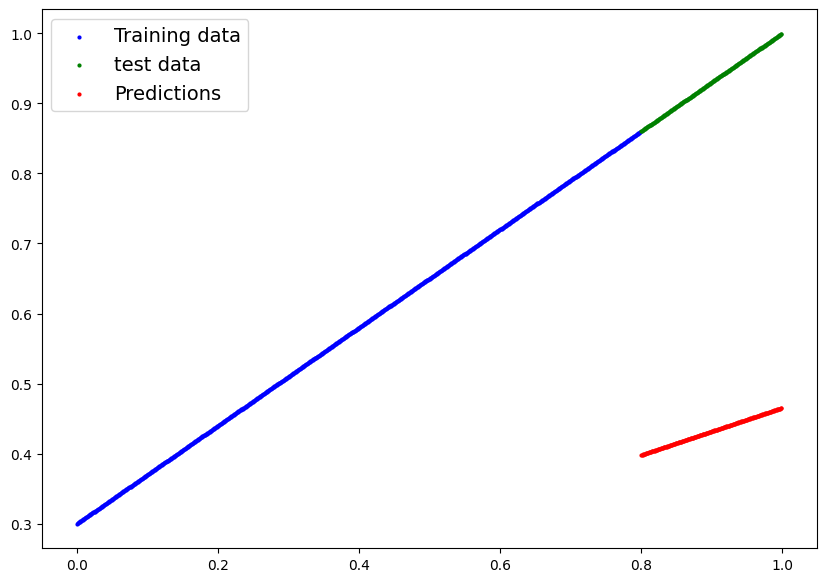

In [45]:
plot_predictions(predictions=y_preds_new)

In [46]:
# an epoch is 1 loop thoguh the data
torch.manual_seed(42)
epochs =12000

#track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

# loop
for epoch in range(epochs):

  #set the model to training model
  model_first.train()# train model in pytorch sets all parameters that requires gradients to make it require gradient

  # taking the forward_ pass
  y_pred=model_first(X_train)


  #calculate the loss using the losss function
  loss=loss_fn(y_pred,y_train)

  #optimizer ero grad
  optimiser.zero_grad()

  #perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #/Step the optimiser(perform the actual gradient descent)
  optimiser.step() # by default how the optimiser changes will accumulate through the loop .. so we have to zero thenm before step 3

  model_first.eval() # turns of gradient tracking


  with torch.inference_mode():

    test_pred=model_first(X_test)

    test_loss=loss_fn(test_pred,y_test)
  if epoch %100 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())


    print(f"Epoch;{epoch} | test : {loss} | test loss {test_loss}")
    print(model_first.state_dict())
  #with torch.no_grad(): same as above but used in older versions


Epoch;0 | test : 0.31633278727531433 | test loss 0.4978516697883606
OrderedDict({'weights': tensor([0.3367]), 'bias': tensor([0.1289])})
Epoch;100 | test : 0.3047372102737427 | test loss 0.48425936698913574
OrderedDict({'weights': tensor([0.3407]), 'bias': tensor([0.1389])})
Epoch;200 | test : 0.2931416630744934 | test loss 0.4706670045852661
OrderedDict({'weights': tensor([0.3447]), 'bias': tensor([0.1489])})
Epoch;300 | test : 0.28154608607292175 | test loss 0.45707467198371887
OrderedDict({'weights': tensor([0.3487]), 'bias': tensor([0.1589])})
Epoch;400 | test : 0.2699504792690277 | test loss 0.443482369184494
OrderedDict({'weights': tensor([0.3527]), 'bias': tensor([0.1689])})
Epoch;500 | test : 0.25835490226745605 | test loss 0.4298900365829468
OrderedDict({'weights': tensor([0.3567]), 'bias': tensor([0.1789])})
Epoch;600 | test : 0.2467593401670456 | test loss 0.4162977337837219
OrderedDict({'weights': tensor([0.3607]), 'bias': tensor([0.1889])})
Epoch;700 | test : 0.23516376316

In [47]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([0.3163328 , 0.3047372 , 0.29314166, 0.2815461 , 0.26995048,
        0.2583549 , 0.24675934, 0.23516376, 0.22356817, 0.2119726 ,
        0.20037703, 0.18878146, 0.1771859 , 0.16559163, 0.15399754,
        0.14240344, 0.13080937, 0.11921528, 0.10827067, 0.09882619,
        0.09070628, 0.08374371, 0.07778848, 0.07270753, 0.06838213,
        0.06470557, 0.06158471, 0.05893682, 0.05669031, 0.05478166,
        0.05315676, 0.05176841, 0.05057648, 0.04954711, 0.04865143,
        0.04786506, 0.04716812, 0.04654326, 0.04597666, 0.04545701,
        0.04497496, 0.04452302, 0.04409506, 0.04368601, 0.04329188,
        0.04290938, 0.0425363 , 0.04217018, 0.04180993, 0.04145401,
        0.04110151, 0.04075172, 0.04040387, 0.04005752, 0.03971203,
        0.03936758, 0.03902407, 0.03868115, 0.03833877, 0.03799624,
        0.03765361, 0.03731131, 0.03696935, 0.0366274 , 0.03628559,
        0.03594395, 0.03560231, 0.03526067, 0.03491903, 0.03457738,
        0.03423604, 0.03389477, 0.03355351, 0.03

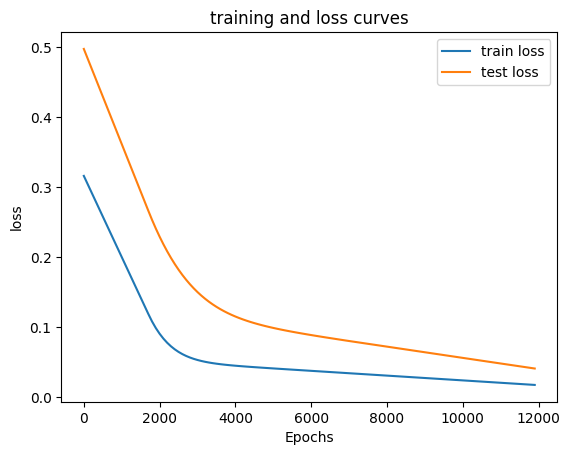

In [48]:
plt.plot(epoch_count, loss_values, label="train loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
plt.title("training and loss curves")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()


# saving a model in pytorch


In [49]:
"""torch.save()- allows to save a pytorch object in python's pickle format
  torch.load()- load a saved pytorch object
  torch.nn.Module.load_state_dict()- allows to load a model's saved state dictionary
 """
from pathlib import Path # saivng the Pytorch model


# creating the models directory
MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


#2. Create the model save path
MODEL_NAME= "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH= MODEL_PATH/ MODEL_NAME

#save the model state_dict
print(f"saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=LinearRegressionModel.state_dict(), f=MODEL_SAVE_PATH)

saving model to :models/01_pytorch_workflow_model_0.pth


TypeError: Module.state_dict() missing 1 required positional argument: 'self'